# Data Science Project: Planning Stage - **UBC Minecraft Research Server**

**Students:** Shaurya V. Shastri, Catherine Harris, Jessica Wang                                              
**Date:** 07-12-2025         
**Course:** DSCI100-009

---
GitHub Repository: https://github.com/symkk79/dsci_100_project.git

## 1. Introduction
In the past decade, we have seen a sharp rise in online gaming communities, which made understanding player engagement an essential part of managing servers and designing outreach strategies. Knowing which kinds of players are more likely to stay involved can help developers plan resources and tailor recruitment and communication campaigns.

The broad question we are focusing on is: 
> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

We aim to answer the following question:
> Can the age of the player predict if the player subscribes to a game-related newsletter in players.csv?

This analysis explores the relationship between player activity and continued interestrecordse game community.

### Dataset Description
The data set we use is from a UBC Computer Science Minecraft research server, which record player activity for the purpose of studying engagement patterns. Dataset of Players.csv describes the characteristics of each player and whether they chose to subscribe to a game-related newsletter.

**Variables**
| Variable   | Type        | Meaning |
| ---------- | ----------- | ------- |
|experience  | categorical | What category of experience the player falls into|
|subscribe   | categorical | Whether or not the player is subscribed to a game-related newsletter|
|hashedEmail | categorical | The email of the player|
|played_hours| quantitative| The amount of hours played| 
|name        | categorical | The name of the player|
|gender      | categorical | The gender of the player|
|Age         | quantitative| The age of the player |


<center>Figure 1.1: Variable Explanation </center>

## 2. Method
The methods section will outline the full analysis workflow, including:
- Data Import and Wrangling
- Exploratory Data Visualization
- Data Analysis

First, we began by importing the `players` dataset directly from the provided GitHub URL. After loading the data, we checked variable types and cleaned the dataset by mutating the `experience` variable from text categories into ordered numeric values, making it easier to use in summary statistics and visualizations.

Next, we generated basic summary statistics, including the number of observations, mean age, and mean hours played. These summaries allowed us to understand the distribution of the data and identify any potential anomalies, such as extreme values.

We then conducted exploratory data visualization to examine potential relationships between player characteristics and their subscription status. This included plotting:
- Experience level vs. subscription
- Gender vs. subscription
- Age vs. subscription
- Hours played vs. subscription (with extreme values filtered out)

### 2.1 Data Import & Wrangling

Data import stage includes: 
1. Loading the dataset from the URL;
2. Mutating the variables in the dataset into a more workable format
3. Producing summary statistics

#### 0. Setting Up ####

In [28]:
library(tidyverse)
library(purrr)
library(ggplot2)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



#### 1. Loading Dataset from URLs ####

In [16]:
players_URL <- "https://raw.githubusercontent.com/symkk79/dsci-100-project-planning-dataset/main/players.csv"
players_data <- read_csv(players_URL)

players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### 2. Mutating variables to proper value ####

We recoded the `experience` variable from text categories into ordered numeric values (1–5). This makes the variable easier to work with during visualization and modeling because numeric values allow for comparisons and distance-based methods, such as KNN.

In [17]:
summary_data <- players_data |>
    mutate(
    experience = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur"  ~ 2,
    experience == "Regular"  ~ 3,
    experience == "Veteran"  ~ 4,
    experience == "Pro"      ~ 5,
    )
  )

summary_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<dbl>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
2,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
3,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
2,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
3,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
2,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
2,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### 3. Generating Summary Statistics  ####
We generate basic summary statistics for the players dataset, including counts and mean values for key variables such as age and hours played. This helps us understand the overall distribution of the data and identify any potential anomalies before modelling.

In [18]:
summary_data <- players_data |>
                summary(digit = 3) 

summary_data

  experience        subscribe       hashedEmail         played_hours   
 Length:196         Mode :logical   Length:196         Min.   :  0.00  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.00  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.10  
                                                       Mean   :  5.85  
                                                       3rd Qu.:  0.60  
                                                       Max.   :223.10  
                                                                       
     name              gender               Age      
 Length:196         Length:196         Min.   : 9.0  
 Class :character   Class :character   1st Qu.:17.0  
 Mode  :character   Mode  :character   Median :19.0  
                                       Mean   :21.1  
                                       3rd Qu.:22.8  
                                       Max.   :58.0  
                                       NA's   

In [19]:
observation_count <- players_data |>
                    count()
observation_count

n
<int>
196


In [20]:
players_mean <- players_data |>
                select(played_hours, Age) |>
                map_dfr(mean, na.rm = TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


| Variable     | Mean |
| ------------ | ---- |
| Hours Played | 6    |
| Age          | 21   |

### 2.2 Data Visualization

The Data visualization includes:

1. Visualizing the relationship between age and subscription status


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


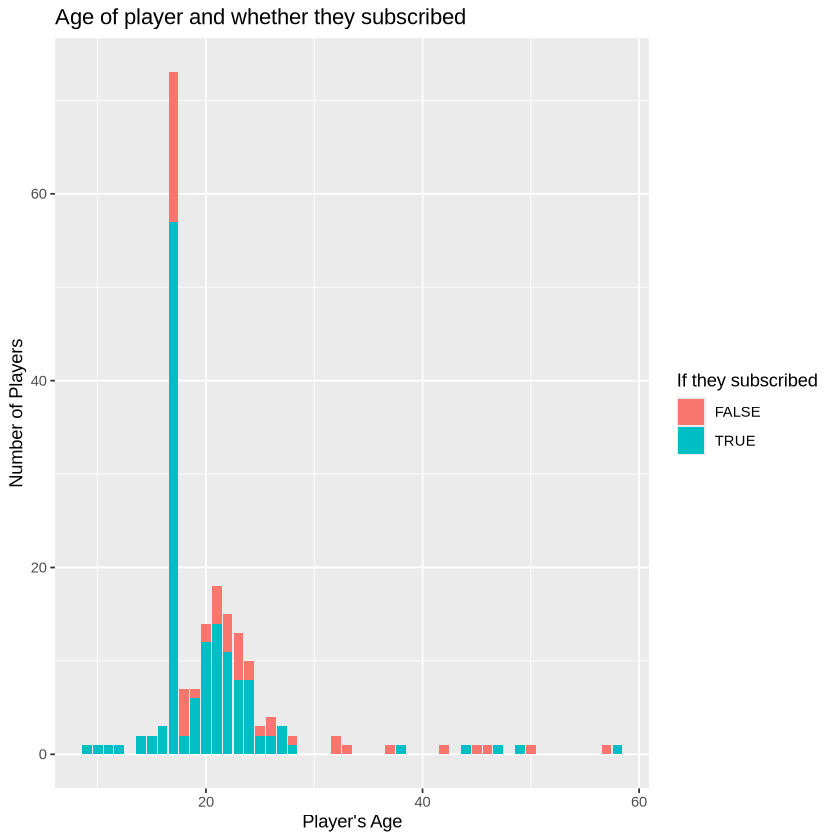

In [53]:
age_vs_subscription_graph <- players_data |>
                            ggplot(aes(x = Age, fill = subscribe)) +
                            geom_bar() +
                            labs(x = "Player's Age", y = "Number of Players", fill = "If they subscribed") +
                            ggtitle("Age of player and whether they subscribed")
age_vs_subscription_graph

<center>Figure 2.3: Visualization of the age of players and whether they subscribed </center>
This histogram displays how subscription status varies across ages. Younger players appear slightly more likely to subscribe, while older players subscribe less frequently, though the relationship is weak.

In [54]:
wrangled_player_data <- players_data |>
    select(Age, subscribe) |>
    drop_na() |>
    mutate(subscribe = as_factor(subscribe)) 
    

set.seed(1234)

player_split <- initial_split(wrangled_player_data, prop = 0.75, strata = subscribe)  
player_train <- training(player_split)   
player_test <- testing(player_split)


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

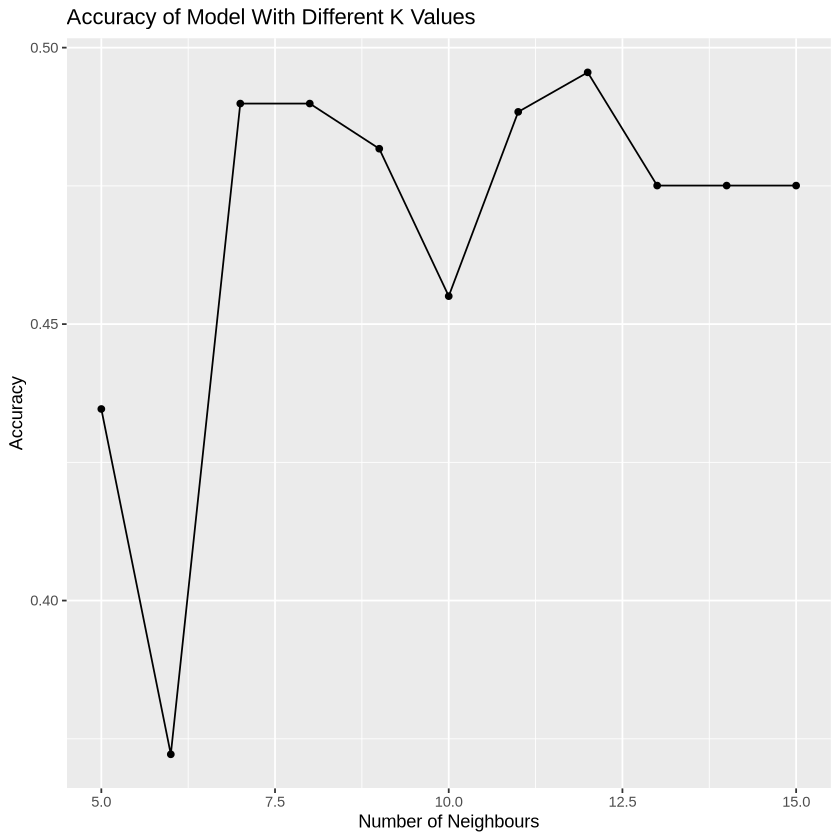

In [52]:

set.seed(453)

training_recipe <- recipe(subscribe ~ Age, data = player_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

training_model <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

training_v_fold <- vfold_cv(player_train, v = 10, strata = subscribe)

k_values <- tibble(neighbors = seq(from = 5, to = 15, by = 1))

training_workflow <- workflow() |>
                    add_recipe(training_recipe) |>
                    add_model(training_model) |>
                   tune_grid(resamples = training_v_fold, grid = k_values) |>
                   collect_metrics()

accuracies <- training_workflow |>
                filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Number of Neighbours', y = 'Accuracy') +
                  ggtitle("Accuracy of Model With Different K Values")
                  scale_x_continuous(breaks = 5:15)
cross_val_plot
                  

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

In [47]:

player_test_predictions <- predict(player_fit, player_test) |>
  bind_cols(player_test)


test_accuracies <- player_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") 


test_precision <- player_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="first") 

test_recall <- player_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="first")

test_accuracies
test_precision
test_recall

conf_mat <- player_test_predictions |>
                conf_mat(truth = subscribe, estimate = .pred_class)
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4489796


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.1818182


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3076923


          Truth
Prediction FALSE TRUE
     FALSE     4   18
     TRUE      9   18